# Laboratorio No.5 de Security Data-Science
## Por Jose Gutierrez, 19111

<h1 style="color:rgb(102, 166, 38);">1° Part: Package Analyzer</h1>

<h3 style="color:rgb(102, 166, 38);">Importar librerias</h3>

In [1]:
from scapy.all import *
from scapy.layers.l2 import Ether
from scapy.layers.inet import IP
from scapy.layers.inet import TCP, UDP

import pandas as pd 
import numpy as np 
import binascii
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


<h3 style="color:rgb(102, 166, 38);">Capture 10 paquetes con la herramienta scapy, imprima el tipo de datos, la longitud y el
contenido del pcap</h3>

In [2]:
scapy_cap_own = rdpcap('own.pcap')
n = 1
for packet in scapy_cap_own:
    print('Paquete No.', n, '\n')
    print(packet.show())
    print('\n')
    n += 1

Paquete No. 1 

###[ Ethernet ]### 
  dst       = 14:4f:8a:34:91:76
  src       = d4:ab:82:cb:ff:27
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 302
     id        = 0
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = udp
     chksum    = 0xb764
     src       = 192.168.0.252
     dst       = 192.168.0.14
     \options   \
###[ UDP ]### 
        sport     = 39620
        dport     = 64188
        len       = 282
        chksum    = 0x55e9
###[ Raw ]### 
           load      = 'HTTP/1.1 200 OK\r\nCACHE-CONTROL: max-age=1801\r\nDATE: Sun, 16 Apr 2023 21:50:21 GMT\r\nEXT:\r\nLOCATION: http://192.168.100.3:49152/wps_device.xml\r\nSERVER: Unspecified, UPnP/1.0, Unspecified\r\nST: upnp:rootdevice\r\nUSN: uuid:ba737a94-698b-506f-8de1-496651bea27b::upnp:rootdevice\r\n\r\n'

None


Paquete No. 2 

###[ Ethernet ]### 
  dst       = 14:4f:8a:34:91:76
  src       = d4:ab:82:cb:ff:27
  type      = IPv4
###[ IP


None




<h3 style="color:rgb(102, 166, 38);">Añada al pcap de 10 paquetes el archivo analisis_paquetes.pcap</h3>

In [3]:
scapy_cap_alt = rdpcap('analisis_paquetes.pcap')

for packet in scapy_cap_alt:
    scapy_cap_own.append(packet)

<h3 style="color:rgb(102, 166, 38);">Convierta el pcap a un DataFrame</h3>

In [4]:
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

dataframe_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']


df = pd.DataFrame(columns=dataframe_fields)
for packet in scapy_cap_own[IP]:    
    field_values = []
    
    for field in ip_fields:
        if field == 'options':           
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])
    
    field_values.append(packet.time)
    
    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)
    
    
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

df = df.reset_index()
df = df.drop(columns="index")

In [5]:
df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
0,4,5,0,302,0,DF,0,64,17,46948,...,None,None,None,None,21993,None,None,274,b'HTTP/1.1 200 OK\r\nCACHE-CONTROL: max-age=18...,b'485454502f312e3120323030204f4b0d0a4341434845...
1,4,5,0,302,0,DF,0,64,17,46948,...,None,None,None,None,21993,None,None,274,b'HTTP/1.1 200 OK\r\nCACHE-CONTROL: max-age=18...,b'485454502f312e3120323030204f4b0d0a4341434845...
2,4,5,0,311,0,DF,0,64,17,46939,...,None,None,None,None,62156,None,None,283,b'HTTP/1.1 200 OK\r\nCACHE-CONTROL: max-age=18...,b'485454502f312e3120323030204f4b0d0a4341434845...
3,4,5,0,311,0,DF,0,64,17,46939,...,None,None,None,None,62156,None,None,283,b'HTTP/1.1 200 OK\r\nCACHE-CONTROL: max-age=18...,b'485454502f312e3120323030204f4b0d0a4341434845...
4,4,5,0,366,0,DF,0,64,17,46884,...,None,None,None,None,277,None,None,338,b'HTTP/1.1 200 OK\r\nCACHE-CONTROL: max-age=18...,b'485454502f312e3120323030204f4b0d0a4341434845...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,4,5,32,84,8744,,0,122,17,64011,...,None,None,None,None,65088,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
68,4,5,0,969,1,,0,64,17,21214,...,None,None,None,None,671,None,None,941,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
69,4,5,32,84,9344,,0,122,17,63411,...,None,None,None,None,65089,None,None,56,b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...,b'000c8180000100010000000006676f6f676c6503636f...
70,4,5,0,588,1,,0,64,17,21595,...,None,None,None,None,54406,None,None,560,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...


<h3 style="color:rgb(102, 166, 38);">Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port</h3>

In [6]:
df[['src','dst','sport','dport']]

,src,dst,sport,dport
0,192.168.0.252,192.168.0.14,39620,64188
1,192.168.0.252,192.168.0.14,39620,64188
2,192.168.0.252,192.168.0.14,39620,64188
3,192.168.0.252,192.168.0.14,39620,64188
4,192.168.0.252,192.168.0.14,39620,64188
...,...,...,...,...
67,84.54.22.33,10.1.10.53,53,53
68,10.1.10.53,84.54.22.33,53,53
69,84.54.22.33,10.1.10.53,53,53
70,10.1.10.53,84.54.22.33,53,53


<h3 style="color:rgb(102, 166, 38);">Estadísticas</h3>

<h4 style="color:rgb(102, 166, 38);">A. Muestre cual es la IP origen más frecuente</h4>

In [7]:
df2 = df.groupby(['src'])['src'].count()
print(df2.head(1))

src
10.1.10.53    31
Name: src, dtype: int64


<h4 style="color:rgb(102, 166, 38);">B. Muestre cual es la IP destino más frecuente</h4>

In [8]:
df3 = df.groupby(['dst'])['dst'].count()
print(df3.head(1))

dst
10.1.10.53    31
Name: dst, dtype: int64


<h4 style="color:rgb(102, 166, 38);">C. ¿A qué IPs se comunica la IP del inciso A?</h4>

In [9]:
frequent_address = df['src'].describe()['top']

print(df[df['src'] == frequent_address]['dst'].unique())

['84.54.22.33' '75.75.75.75']


<h4 style="color:rgb(102, 166, 38);">D. ¿A qué puertos destino se comunica la IP del inciso A?</h4>

In [10]:
print(df[df['src'] == frequent_address]['dport'].unique())

[53]


<h4 style="color:rgb(102, 166, 38);">E. ¿A qué puertos origen se comunica la IP del inciso B?</h4>

In [11]:
print(df[df['src'] == frequent_address]['sport'].unique())

[53 15812 23903]


<h4 style="color:rgb(102, 166, 38);">F. Indique el propósito de los puertos que más aparece en los incisos D y E</h4>

- Puerto 53: Puerto usado por el protocolo de Sistema de nombres de dominio (DNS). Sin embargo, cuando el tamaño de la información envíada supera los 512 bytes, este cambia al protocolo de Control de Transmisión (TCP), el cual garantiza la entrega de paquetes de datos en la misma orden, en que fueron mandados.

- Puerto 15812: Puerto usado por el Protocolo de Control de Transmisión (TCP).

- Puerto 23903: Puerto usado por el Protocolo de Control de Transmisión (TCP).

<h3 style="color:rgb(102, 166, 38);">Gráficas</h3>

<h4 style="color:rgb(102, 166, 38);">A. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads
enviados de dichas direcciones.</h4>

Text(0, 0.5, 'IP')

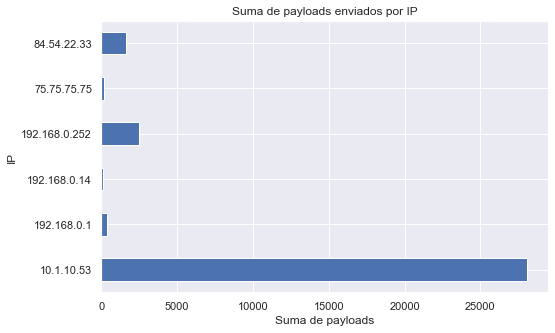

In [12]:
source_addresses = df.groupby("src")['payload'].sum()
source_addresses.plot(kind='barh',title="Suma de payloads enviados por IP",figsize=(8,5))
plt.xlabel('Suma de payloads')
plt.ylabel('IP')

<h4 style="color:rgb(102, 166, 38);">B. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads
recibidos en dichas direcciones.</h4>

Text(0, 0.5, 'IP')

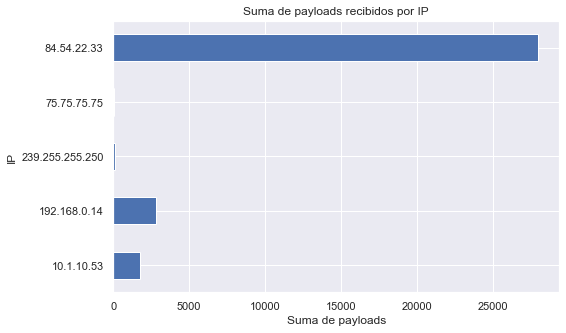

In [13]:
destination_addresses = df.groupby("dst")['payload'].sum()
destination_addresses.plot(kind='barh', title="Suma de payloads recibidos por IP",figsize=(8,5))
plt.xlabel('Suma de payloads')
plt.ylabel('IP')

<h4 style="color:rgb(102, 166, 38);">C. Muestre una gráfica 2D, en el eje Y los puertos origen, y en el eje X la suma de los
payloads enviados de dichos puertos.</h4>

Text(0, 0.5, 'Puerto')

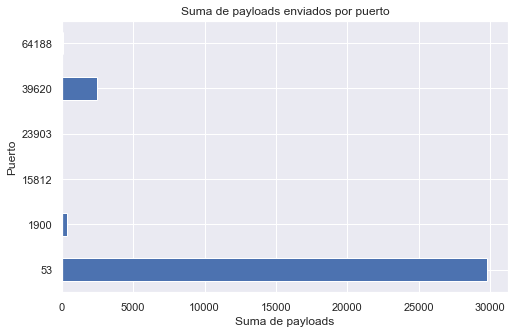

In [14]:
source_payloads = df.groupby("sport")['payload'].sum()
source_payloads.plot(kind='barh',title="Suma de payloads enviados por puerto",figsize=(8,5))
plt.xlabel('Suma de payloads')
plt.ylabel('Puerto')

<h4 style="color:rgb(102, 166, 38);">D. Muestre una gráfica 2D, en el eje Y los puertos destino, y en el eje X la suma de los
payloads recibidos en dichos puertos.</h4>

Text(0, 0.5, 'Puerto')

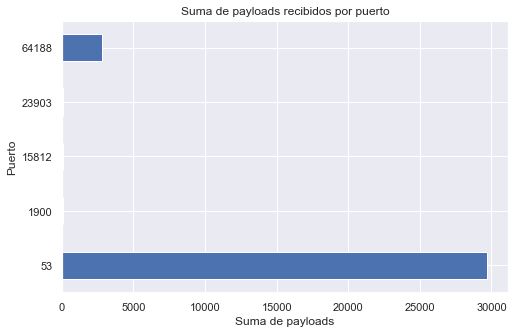

In [15]:
destination_payloads = df.groupby("dport")['payload'].sum()
destination_payloads.plot(kind='barh',title="Suma de payloads recibidos por puerto",figsize=(8,5))
plt.xlabel('Suma de payloads')
plt.ylabel('Puerto')

<h3 style="color:rgb(102, 166, 38);">Investigación del payload</h3>

<h4 style="color:rgb(102, 166, 38);">A. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
más frecuente.</h4>

In [16]:
frequent_address_df = df[df['src']==frequent_address]

In [17]:
frequent_address_df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
10,4,5,0,961,1,,0,64,17,21222,...,None,None,None,None,62990,None,None,933,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
12,4,5,0,975,1,,0,64,17,21208,...,None,None,None,None,36378,None,None,947,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
14,4,5,0,1012,1,,0,64,17,21171,...,None,None,None,None,63846,None,None,984,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
16,4,5,0,998,1,,0,64,17,21185,...,None,None,None,None,65315,None,None,970,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
18,4,5,0,1003,1,,0,64,17,21180,...,None,None,None,None,38088,None,None,975,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
20,4,5,0,1045,1,,0,64,17,21138,...,None,None,None,None,5707,None,None,1017,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
22,4,5,0,1008,1,,0,64,17,21175,...,None,None,None,None,31270,None,None,980,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
24,4,5,0,979,1,,0,64,17,21204,...,None,None,None,None,11600,None,None,951,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
26,4,5,0,959,1,,0,64,17,21224,...,None,None,None,None,7922,None,None,931,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
28,4,5,0,992,1,,0,64,17,21191,...,None,None,None,None,22145,None,None,964,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...


<h4 style="color:rgb(102, 166, 38);">B. Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por
payload.</h4>

In [18]:
frequent_address_groupby = frequent_address_df[['src','dst','payload']].groupby("dst")['payload'].sum()

In [19]:
frequent_address_groupby

dst
75.75.75.75       74
84.54.22.33    27979
Name: payload, dtype: object

<h4 style="color:rgb(102, 166, 38);">C. Obtenga la IP que más ha intercambiado bytes con la IP más frecuente. Esta IP es
sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.</h4>

In [20]:
suspicious_ip = frequent_address_groupby.sort_values(ascending=False).index[0]
print("La IP que parece ser sospechosa por la cantidad de bytes intercambiados es:", suspicious_ip)

La IP que parece ser sospechosa por la cantidad de bytes intercambiados es: 84.54.22.33


<h4 style="color:rgb(102, 166, 38);">D. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.</h4>

In [21]:
suspicious_df = frequent_address_df[frequent_address_df['dst']==suspicious_ip]

In [22]:
suspicious_df

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,dataofs,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex
10,4,5,0,961,1,,0,64,17,21222,...,None,None,None,None,62990,None,None,933,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
12,4,5,0,975,1,,0,64,17,21208,...,None,None,None,None,36378,None,None,947,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
14,4,5,0,1012,1,,0,64,17,21171,...,None,None,None,None,63846,None,None,984,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
16,4,5,0,998,1,,0,64,17,21185,...,None,None,None,None,65315,None,None,970,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
18,4,5,0,1003,1,,0,64,17,21180,...,None,None,None,None,38088,None,None,975,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
20,4,5,0,1045,1,,0,64,17,21138,...,None,None,None,None,5707,None,None,1017,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
22,4,5,0,1008,1,,0,64,17,21175,...,None,None,None,None,31270,None,None,980,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
24,4,5,0,979,1,,0,64,17,21204,...,None,None,None,None,11600,None,None,951,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
26,4,5,0,959,1,,0,64,17,21224,...,None,None,None,None,7922,None,None,931,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...
28,4,5,0,992,1,,0,64,17,21191,...,None,None,None,None,22145,None,None,964,b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'000c0100000100000000000006676f6f676c6503636f...


<h4 style="color:rgb(102, 166, 38);">E y F. Obtenga los payloads del DF del inciso 6, y añada cada uno en un array. Muestre el contenido del array.</h4>

In [23]:
raw_stream = []
for p in suspicious_df['payload_raw']:
    raw_stream.append(p)
    
print(raw_stream)

[b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01b\x00\x00\x00\xef\xbf\xbd\x08\x06\x00\x00\x00(\xef\xbf\xbdTR\x00\x00:\xef\xbf\xbdIDATx\xef\xbf\xbd\xef\xbf\xbd\t|T\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd;K\x12\x08;\x08\xef\xbf\xbd\nE\xef\xbf\xbd\xef\xbf\xbd$\x19\xef\xbf\xbd\xef\xbf\xbdZi\xdf\xaa-\xef\xbf\xbd;N2\xef\xbf\xbd\xef\xbf\xbdV\xef\xbf\xbdV\xef\xbf\xbda\xef\xbf\xbdZ\x11!\xef\xbf\xbd\xef\xbf\xbd\x01\xdc\xbbik[\xef\xbf\xbd.ok\xef\xbf\xbde\xef\xbf\xbd\x01\\\xef\xbf\xbd\xef\xbf\xbd]\xef\xbf\xbd-\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdd\xef\xbf\xbd\x08\xef\xbf\xbd\x08\xef\xbf\xbd\xef\xbf\xbdg\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd<\xef\xbf\xbd\xef\xbf\xbdL\x12\xef\xbf\xbd$3wf\xef\xbf\xbd\xef\xbf\xbd\x02<_\r\xef\xbf\xbdY\xef\xbf\xbdr\xef\xbf\xbd\xef\xbf\xbdy\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x1c\r\x18\xef\xbf\xbd8c\xef\xbf\xbdew\r\x1e\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xb

<h4 style="color:rgb(102, 166, 38);">G. Examine los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido
que se envié a través del puerto explicado en el inciso F?</h4>

Es raro encontrar bytes de una imagen PNG dentro del payload del DNS, dado a que la información que maneja este protocolo debe estar relacionada metadatos como el nombre del servidor, direcciones IPs